In [1]:
import matplotlib.pyplot as plt
import numpy as np
from funcs import system_solve

# sinewave
func = lambda x: np.sin(x + np.pi/2 + 0.5)

"""
set parameters
maxdist: maximum distance object can travel
(will be used for total time estimation)
Tmax: also used for total time estimation)
N_points: amount of points to simulate (uniform with time)
mu: friction coef
s0, v0: initial travelled distance & velocity
"""
maxdist = 30
Tmax = 30
N_points = 100
mu = 0.002
s0 = 0
v0 = 0

sol = system_solve(func,
                   maxdist=maxdist,
                   N_points=N_points,
                   Tmax=Tmax,
                   mu=mu,
                   s0=s0,
                   v0=v0)

time_values = sol[0, :]
distance_values = sol[1, :]
velocity_values = sol[2, :]
x_values = sol[3, :]
y_values = sol[4, :]
slope_values = sol[5, :]

Plot x- y- and slope-values of curve

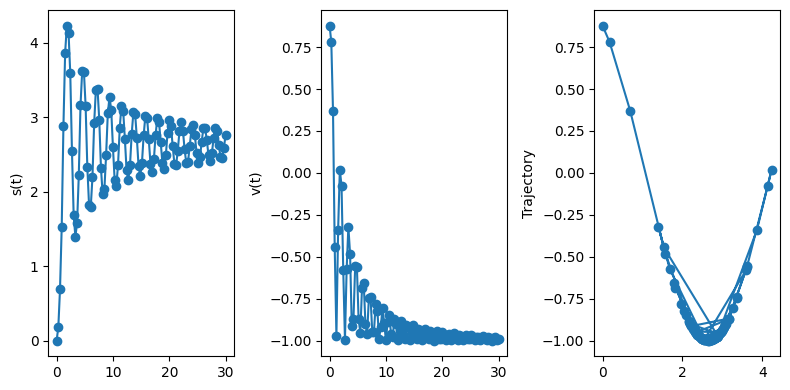

[ 0.          0.3030303   0.60606061  0.90909091  1.21212121  1.51515152
  1.81818182  2.12121212  2.42424242  2.72727273  3.03030303  3.33333333
  3.63636364  3.93939394  4.24242424  4.54545455  4.84848485  5.15151515
  5.45454545  5.75757576  6.06060606  6.36363636  6.66666667  6.96969697
  7.27272727  7.57575758  7.87878788  8.18181818  8.48484848  8.78787879
  9.09090909  9.39393939  9.6969697  10.         10.3030303  10.60606061
 10.90909091 11.21212121 11.51515152 11.81818182 12.12121212 12.42424242
 12.72727273 13.03030303 13.33333333 13.63636364 13.93939394 14.24242424
 14.54545455 14.84848485 15.15151515 15.45454545 15.75757576 16.06060606
 16.36363636 16.66666667 16.96969697 17.27272727 17.57575758 17.87878788
 18.18181818 18.48484848 18.78787879 19.09090909 19.39393939 19.6969697
 20.         20.3030303  20.60606061 20.90909091 21.21212121 21.51515152
 21.81818182 22.12121212 22.42424242 22.72727273 23.03030303 23.33333333
 23.63636364 23.93939394 24.24242424 24.54545455 24.

In [2]:
plt.figure(figsize=(8, 4))
plt.subplot(131); plt.plot(time_values, x_values, 'o-'); plt.ylabel('s(t)')
plt.subplot(132); plt.plot(time_values, y_values, 'o-'); plt.ylabel('v(t)')
plt.subplot(133); plt.plot(x_values, y_values, 'o-'); plt.ylabel('Trajectory')

plt.tight_layout(); plt.show()

print(time_values)

Visualize trajectory of object by animating its path

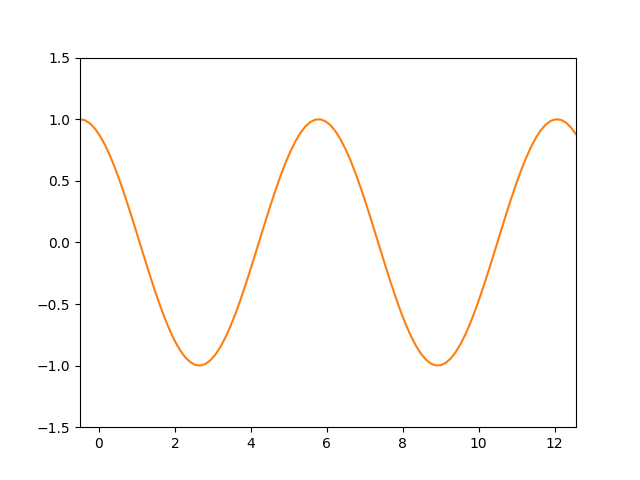

In [3]:
%matplotlib widget
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
x_lower = -0.5
x_upper = 4 * np.pi
y_lower = -1.5
y_upper = 1.5
interval = 50 # ms between frames

ax.set_xlim([x_lower, x_upper])
ax.set_ylim([y_lower, y_upper])

anim_plot = ax.plot([], [])
xrange = np.linspace(x_lower, x_upper, 100)
scatter = ax.scatter([], [])

ax.plot(xrange, func(xrange))

def update_frame(frame):
    # Update scatter with first 'frame+1' points
    current_x = x_values[frame]
    current_y = y_values[frame]
    print(frame)
    scatter.set_offsets(np.column_stack([current_x, current_y]))
    return [scatter]

anim = FuncAnimation(fig, update_frame, frames=N_points, interval=interval, blit=True)